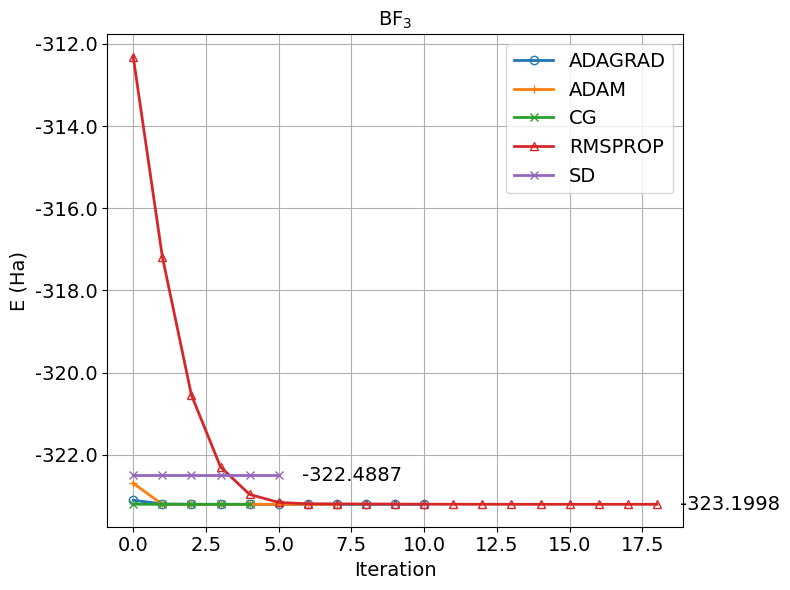

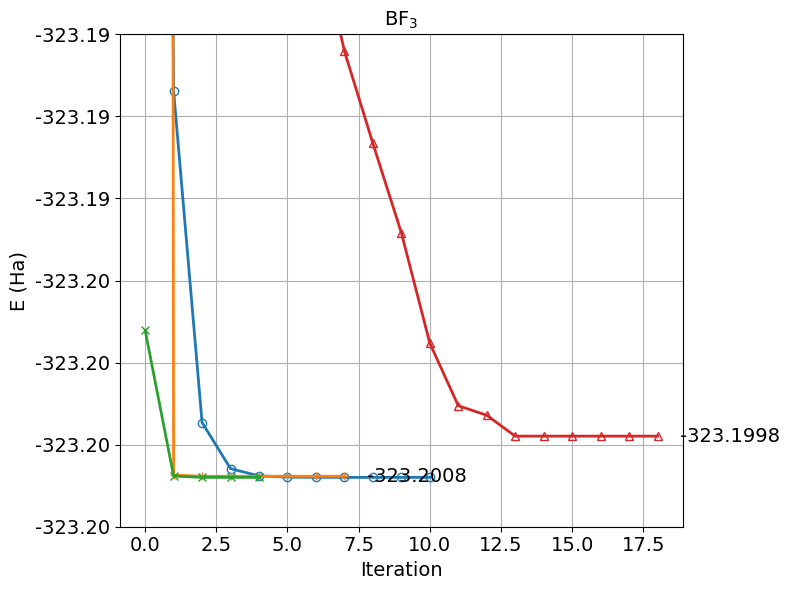

In [1]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
import re

def format_molecule(name: str) -> str:
    # Sustitutes numbers by subindixes in LaTeX for molecule naming
    # ie H2O to H_2O
    return re.sub(r'(\d+)', r'$_{\1}$', name.upper())

#Select molecule data to plot
molecule = "bf3"
#Convert molecule name to latex format
title_str = format_molecule(molecule)

# Read the data
data = defaultdict(list)  # alpha: list of (iteration, energy)

with open(f"{molecule}.csv", mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        alg = row['alg']
        iteration = int(row['iteration'])
        energy = float(row['energy'])
        data[alg].append((iteration, energy))

# Plot

markers = ['o', '+', 'x', '^', 'x', 'o', '+']
final_energies = []
plt.figure(figsize=(8, 6))
plt.tick_params(axis='both', labelsize=14)

for i, (alg, points) in enumerate(sorted(data.items())):
    iterations, energies = zip(*points)
    marker = markers[i % len(markers)]
    plt.plot(iterations, energies, marker=marker, markerfacecolor='none',linewidth=2,label=f'{alg}')

 # Only show label for selected alphas
    if alg in ( 'SD', 'RMSPROP'):
        last_x = iterations[-1]
        last_y = energies[-1]
        plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')


plt.xlabel('Iteration', fontsize=14)
plt.ylabel('E (Ha)', fontsize=14)
#plt.title('$\\mathrm{BF_3}$', fontsize=14)
#plt.title(f'{molecule}', fontsize=14)
plt.title(title_str, fontsize=14)

plt.legend(fontsize=14)
plt.grid(True)

# Optional: format Y-axis with 6 decimals
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}"))

plt.tight_layout()
plt.savefig(f"{molecule}_{"HF"}.png", dpi=300)
plt.show()

# === Plot 3: Zoomed Y-axis ===
plt.figure(figsize=(8, 6))
plt.tick_params(axis='both', labelsize=14)

for i, (alg, points) in enumerate(sorted(data.items())):
    iterations, energies = zip(*points)
    marker = markers[i % len(markers)]
    plt.plot(iterations, energies, marker=marker, markerfacecolor='none', linewidth=2,label=f'{alg}')

 # Only show label for selected alphas
    if alg in ('ADAM', 'RMSPROP'):
        last_x = iterations[-1]
        last_y = energies[-1]
        plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')


plt.xlabel('Iteration', fontsize=14)
plt.ylabel('E (Ha)', fontsize=14)
plt.title('$\\mathrm{BF_3}$ (Zoomed In)', fontsize=14)
plt.ylim(-323.202, -323.19)
#plt.legend()
plt.title(title_str, fontsize=14)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.2f}"))
plt.tight_layout()
plt.savefig(f"{molecule}_HF_zoom.png", dpi=300)
plt.show()